Note : This code is developed using google colaboratory with the help of necessary gpu support. It uses Google Drive at various instances to load and save necessary data.

In [0]:
!pip install tensorflow-gpu==2.0.0-rc0
!pip install opencv-python

#Importing necessary liberaries

In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, models
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing import image

from sklearn.model_selection import train_test_split
from tqdm import tqdm

from google.colab import files
from IPython.display import Image
from google.colab import drive
from os import listdir
from keras import datasets

from tensorflow.python.keras.applications import vgg19

drive.mount('/content/gdrive', force_remount='true')

Mounted at /content/gdrive


#Importing Dataset from drive

In [0]:
X=[]
y=[]

path = '/content/gdrive/My Drive/training_100x100/legal/'
data = [os.path.join(path, file) for file in os.listdir(path) if file.endswith('.jpg')]

for i in range(len(data)):
  X.append(cv2.imread(data[i], cv2.IMREAD_UNCHANGED))
  y.append(0)
  #print(i)
  
path = '/content/gdrive/My Drive/training_100x100/no/'
data = [os.path.join(path, file) for file in os.listdir(path) if file.endswith('.jpg')]

for i in range(len(data)):
  X.append(cv2.imread(data[i], cv2.IMREAD_UNCHANGED))
  y.append(1)
  #print(i)
  

#Data Preprocessing

In [0]:
X_max = np.max(X)
X=X/X_max

X=np.array(X)
y=np.array(y)
print(X.shape)
print(y.shape)

(5690, 100, 100, 3)
(5690,)


#Image Specifications

In [0]:
NCLASSES = 2
HEIGHT = 100
WIDTH = 100
NUM_CHANNELS = 3

#Model Initialisation using Transfer learning (VGG19)

In [0]:
model=Sequential()
model.add(vgg19.VGG19(include_top = False, input_shape = (HEIGHT, WIDTH, NUM_CHANNELS), weights ='imagenet', classes = 2, pooling  = MaxPool2D))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].trainable=False

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 3, 3, 512)         20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 4096)              18878464  
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 4097      
Total params: 38,906,945
Trainable params: 18,882,561
Non-trainable params: 20,024,384
_________________________________________________________________
None


In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)

#Training Model

In [0]:
checkpoint_path = "/content/gdrive/My Drive/ktj/saves/checkpoints.pkl"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True,verbose=1)
history = model.fit(X_train, y_train, batch_size = 50, epochs = 30,callbacks=[cp_callback])

Train on 5121 samples
Epoch 1/30
5100/5121 [============================>.] - ETA: 0s - loss: 0.9024 - accuracy: 0.7041
Epoch 00001: saving model to /content/gdrive/My Drive/ktj/saves/checkpoints.pkl
5121/5121 [==============================] - 10s 2ms/sample - loss: 0.9000 - accuracy: 0.7045
Epoch 2/30
5100/5121 [============================>.] - ETA: 0s - loss: 0.3284 - accuracy: 0.8339
Epoch 00002: saving model to /content/gdrive/My Drive/ktj/saves/checkpoints.pkl
5121/5121 [==============================] - 9s 2ms/sample - loss: 0.3280 - accuracy: 0.8340
Epoch 3/30
5100/5121 [============================>.] - ETA: 0s - loss: 0.2574 - accuracy: 0.8769
Epoch 00003: saving model to /content/gdrive/My Drive/ktj/saves/checkpoints.pkl
5121/5121 [==============================] - 9s 2ms/sample - loss: 0.2572 - accuracy: 0.8766
Epoch 4/30
5100/5121 [============================>.] - ETA: 0s - loss: 0.2142 - accuracy: 0.9024
Epoch 00004: saving model to /content/gdrive/My Drive/ktj/saves/ch

#Model Accuracy

Text(0.5, 1.0, 'Model Accuracy')

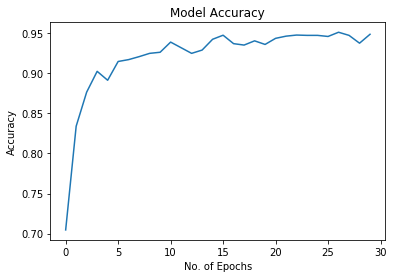

In [0]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

#Model Loss

Text(0.5, 1.0, 'Model Loss')

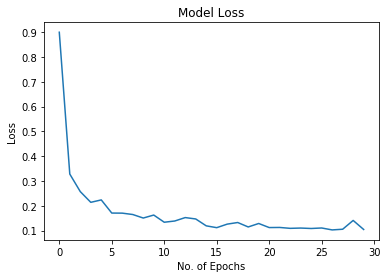

In [0]:
plt.figure()
plt.plot(history.history['loss'])
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

#Testing Model against Test Data

In [0]:
y_pred = model.predict_classes(X_test)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("accuracy score - ",accuracy_score(y_pred, y_test[:len(y_pred)]))
print("Precision Score - ",precision_score(y_pred,y_test[:len(y_pred)]))
print("Recall Score - ",recall_score(y_pred, y_test[:len(y_pred)]))
print("f1 Score - ",f1_score(y_pred, y_test[:len(y_pred)]))

accuracy score -  0.8945518453427065
Precision Score -  0.7722007722007722
Recall Score -  0.9950248756218906
f1 Score -  0.8695652173913043


#Saving Trained model to Google Drive

In [0]:
from keras.backend import manual_variable_initialization
manual_variable_initialization(True)
model.save("/content/gdrive/My Drive/ktj/saves/model_save.h5")
model.save_weights("/content/gdrive/My Drive/ktj/saves/model_weights.pkl")